In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Data
import pandas as pd
from os import sep as sep
import matplotlib.cm as cm

In [2]:
exp_path = r'Y:\Lior&Einav\Experiments\experiment11_140720'
fdata = pd.read_csv(exp_path + sep + 'forager_table_with_feeding_sizes.csv')
fl2ul = pd.read_csv(exp_path + sep + 'conversion_factors_by_weigth_and_feeding_sum.csv')


In [3]:
fdata.head()

,ant_id,feeding_start,feeding_end,food_source,last_interaction_before_end,last_interaction_before_partner,first_interaction_after_start,first_interaction_after_partner,crop_before,crop_after,feeding_size_intensity
0,76,48,102,yellow,43,-1,116,392,293.831787,288061.663399,287767.831612
1,148,92,172,yellow,43,-1,277,76,60206.528134,339347.484375,279140.956241
2,289,177,348,yellow,43,-1,361,72,6457.684912,493706.554688,487248.869775
3,392,203,250,yellow,158,76,294,95,127725.829687,454063.550000,326337.720313
4,289,415,439,yellow,383,72,476,36,359116.687500,497167.730713,138051.043213


In [4]:
fdata['feeding_size_ul'] = fdata.apply(lambda x: x['feeding_size_intensity']/fl2ul[x['food_source']],axis=1)
fdata.head()

,ant_id,feeding_start,feeding_end,food_source,last_interaction_before_end,last_interaction_before_partner,first_interaction_after_start,first_interaction_after_partner,crop_before,crop_after,feeding_size_intensity,feeding_size_ul
0,76,48,102,yellow,43,-1,116,392,293.831787,288061.663399,287767.831612,4.909253
1,148,92,172,yellow,43,-1,277,76,60206.528134,339347.484375,279140.956241,4.762080
2,289,177,348,yellow,43,-1,361,72,6457.684912,493706.554688,487248.869775,8.312353
3,392,203,250,yellow,158,76,294,95,127725.829687,454063.550000,326337.720313,5.567246
4,289,415,439,yellow,383,72,476,36,359116.687500,497167.730713,138051.043213,2.355119


In [5]:
PC_ratios_dict = {'yellow':[2,1],'red':[1,3]}

In [6]:
fdata[['P_mg','C_mg']] = fdata.apply(lambda x: pd.Series(Data.food_volume_to_PC_amounts(x['feeding_size_ul'],PC_ratios_dict[x['food_source']])),axis=1)
fdata.head()

,ant_id,feeding_start,feeding_end,food_source,last_interaction_before_end,last_interaction_before_partner,first_interaction_after_start,first_interaction_after_partner,crop_before,crop_after,feeding_size_intensity,feeding_size_ul,P_mg,C_mg
0,76,48,102,yellow,43,-1,116,392,293.831787,288061.663399,287767.831612,4.909253,0.327284,0.163642
1,148,92,172,yellow,43,-1,277,76,60206.528134,339347.484375,279140.956241,4.762080,0.317472,0.158736
2,289,177,348,yellow,43,-1,361,72,6457.684912,493706.554688,487248.869775,8.312353,0.554157,0.277078
3,392,203,250,yellow,158,76,294,95,127725.829687,454063.550000,326337.720313,5.567246,0.371150,0.185575
4,289,415,439,yellow,383,72,476,36,359116.687500,497167.730713,138051.043213,2.355119,0.157008,0.078504


In [33]:
fdata = fdata.sort_values(by='feeding_start')
fdata['cumP_mg'] = np.cumsum(fdata['P_mg'])
fdata['cumC_mg'] = np.cumsum(fdata['C_mg'])
fdata.head()

,ant_id,feeding_start,feeding_end,food_source,last_interaction_before_end,last_interaction_before_partner,first_interaction_after_start,first_interaction_after_partner,crop_before,crop_after,feeding_size_intensity,feeding_size_ul,P_mg,C_mg,cumP_mg,cumC_mg
0,76,48,102,yellow,43,-1,116,392,293.831787,288061.663399,287767.831612,4.909253,0.327284,0.163642,0.327284,0.163642
1,148,92,172,yellow,43,-1,277,76,60206.528134,339347.484375,279140.956241,4.762080,0.317472,0.158736,0.644756,0.322378
7,76,166,207,red,158,392,229,food,0.000000,219492.476562,219492.476562,3.068699,0.076717,0.230152,0.721473,0.552530
2,289,177,348,yellow,43,-1,361,72,6457.684912,493706.554688,487248.869775,8.312353,0.554157,0.277078,1.275630,0.829609
3,392,203,250,yellow,158,76,294,95,127725.829687,454063.550000,326337.720313,5.567246,0.371150,0.185575,1.646780,1.015183


In [51]:

%matplotlib qt
plt.figure(figsize=[5,5])
plt.set_cmap(cm.Set1)
plt.plot([0, 36],[0, 18],'k',linewidth=0.8)
plt.plot([0,12],[0, 36],'k',linewidth=0.8)
plt.plot([0,fdata['P_mg'].sum()],[0,fdata['C_mg'].sum()],'--k',linewidth=1)
X = np.insert(fdata['cumP_mg'].to_numpy(),0,0)[0:-1]
Y = np.insert(fdata['cumC_mg'].to_numpy(),0,0)[0:-1]
plt.quiver(X,Y,fdata['P_mg'],fdata['C_mg'],fdata.ant_id.astype("category").cat.codes,scale=1,scale_units='xy',angles='xy',width=0.008,alpha=1)
plt.xlim([0,36])
plt.ylim([0,36])
plt.xlabel('Protein [mg]')
plt.ylabel('Carbohydrates [mg]')

Text(0, 0.5, 'Carbohydrates [mg]')

In [9]:
len(fdata['C_mg'])

164

In [10]:
x = fdata['cumC_mg'].to_numpy()
x2 = np.insert(x,0,0)[0:-1]

In [11]:
len(fdata['P_mg'])

164

In [12]:
fdata.ant_id.astype("category").cat.codes

0       2
1       5
2      10
3      11
4      10
       ..
159     6
160     5
161     6
162    14
163     5
Length: 164, dtype: int8

Text(0.5, 0, 'frame')

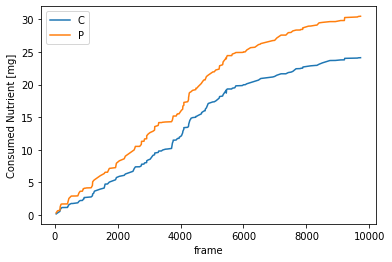

In [66]:
%matplotlib inline
plt.figure()
plt.plot(fdata['feeding_start'],fdata['cumC_mg'])
plt.plot(fdata['feeding_start'],fdata['cumP_mg'])
plt.legend(['C','P'])
plt.ylabel('Consumed Nutrient [mg]')
plt.xlabel('frame')

In [48]:
%matplotlib qt
fig,ax = plt.subplots(figsize=[12,8])
fdata['ant_cumC_mg'] = fdata['C_mg'].groupby(fdata['ant_id']).apply(np.cumsum)
fdata.groupby(fdata['ant_id']).plot('feeding_start','ant_cumC_mg',ax=ax)


ant_id
61     AxesSubplot(0.125,0.125;0.775x0.755)
66     AxesSubplot(0.125,0.125;0.775x0.755)
76     AxesSubplot(0.125,0.125;0.775x0.755)
82     AxesSubplot(0.125,0.125;0.775x0.755)
113    AxesSubplot(0.125,0.125;0.775x0.755)
148    AxesSubplot(0.125,0.125;0.775x0.755)
150    AxesSubplot(0.125,0.125;0.775x0.755)
170    AxesSubplot(0.125,0.125;0.775x0.755)
180    AxesSubplot(0.125,0.125;0.775x0.755)
233    AxesSubplot(0.125,0.125;0.775x0.755)
289    AxesSubplot(0.125,0.125;0.775x0.755)
392    AxesSubplot(0.125,0.125;0.775x0.755)
421    AxesSubplot(0.125,0.125;0.775x0.755)
445    AxesSubplot(0.125,0.125;0.775x0.755)
540    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

In [49]:
fig,ax = plt.subplots(figsize=[12,8])
fdata['ant_cumP_mg'] = fdata['P_mg'].groupby(fdata['ant_id']).apply(np.cumsum)
fdata.groupby(fdata['ant_id']).plot('feeding_start','ant_cumP_mg',ax=ax)


ant_id
61     AxesSubplot(0.125,0.125;0.775x0.755)
66     AxesSubplot(0.125,0.125;0.775x0.755)
76     AxesSubplot(0.125,0.125;0.775x0.755)
82     AxesSubplot(0.125,0.125;0.775x0.755)
113    AxesSubplot(0.125,0.125;0.775x0.755)
148    AxesSubplot(0.125,0.125;0.775x0.755)
150    AxesSubplot(0.125,0.125;0.775x0.755)
170    AxesSubplot(0.125,0.125;0.775x0.755)
180    AxesSubplot(0.125,0.125;0.775x0.755)
233    AxesSubplot(0.125,0.125;0.775x0.755)
289    AxesSubplot(0.125,0.125;0.775x0.755)
392    AxesSubplot(0.125,0.125;0.775x0.755)
421    AxesSubplot(0.125,0.125;0.775x0.755)
445    AxesSubplot(0.125,0.125;0.775x0.755)
540    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

In [50]:
plt.close('all')

In [56]:
# convergence
fdata = fdata.sort_values(by='feeding_start')
fdata['colony_PC_ratio'] = fdata['cumP_mg']/fdata['cumC_mg']
final_ratio = fdata['colony_PC_ratio'].iloc[-1]

plt.figure()
plt.plot(fdata['colony_PC_ratio']-final_ratio)
plt.axhline()

In [63]:
plt.figure()
plt.plot(fdata['feeding_start'],fdata['colony_PC_ratio']-final_ratio)
plt.axhline(color ="k", linestyle ="--")
plt.xlabel('frame')
plt.ylabel('difference from final intake')

Text(0, 0.5, 'difference from final intake')

,ant_id,feeding_start,feeding_end,food_source,last_interaction_before_end,last_interaction_before_partner,first_interaction_after_start,first_interaction_after_partner,crop_before,crop_after,feeding_size_intensity,feeding_size_ul,P_mg,C_mg,cumP_mg,cumC_mg,ant_cumC_mg,ant_cumP_mg,colony_PC_ratio
0,76,48,102,yellow,43,-1,116,392,293.831787,288061.663399,287767.831612,4.909253,0.327284,0.163642,0.327284,0.163642,0.163642,0.327284,2.000000
1,148,92,172,yellow,43,-1,277,76,60206.528134,339347.484375,279140.956241,4.762080,0.317472,0.158736,0.644756,0.322378,0.158736,0.317472,2.000000
7,76,166,207,red,158,392,229,food,0.000000,219492.476562,219492.476562,3.068699,0.076717,0.230152,0.721473,0.552530,0.393794,0.404001,1.305762
2,289,177,348,yellow,43,-1,361,72,6457.684912,493706.554688,487248.869775,8.312353,0.554157,0.277078,1.275630,0.829609,0.277078,0.554157,1.537629
3,392,203,250,yellow,158,76,294,95,127725.829687,454063.550000,326337.720313,5.567246,0.371150,0.185575,1.646780,1.015183,0.185575,0.371150,1.622150


In [65]:
#plt.close('all')

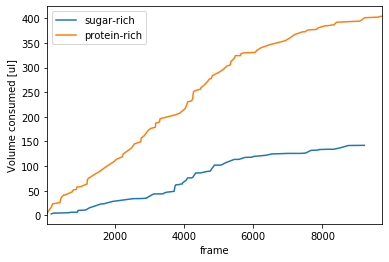

In [73]:
fig,ax = plt.subplots()
fdata.reset_index()
fdata['cum_vol'] = fdata.groupby(fdata['food_source'])['feeding_size_ul'].apply(np.cumsum)
fdata.groupby(fdata['food_source']).plot('feeding_start','cum_vol',ax=ax)
plt.xlabel('frame')
plt.ylabel('Volume consumed [ul]')
plt.legend(['sugar-rich','protein-rich'])